In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

In [3]:
df = pd.read_csv('student_scores.csv')

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


This task is a simple linear regression 

The independent varible is the Hours and the dependent variable is the scores

In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


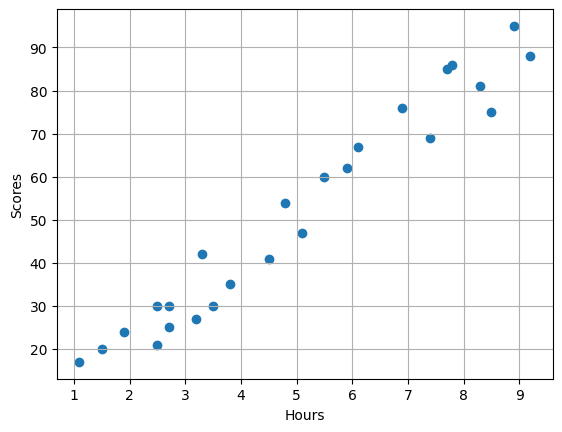

In [8]:
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


High correclation means strong linear relationship

## Training and validation

In [10]:
X = df[['Hours']]
y = df[['Scores']]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X, y,train_size=0.8 ,test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()


In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [14]:
intercept = model.intercept_
slope = model.coef_[0]

print(intercept)
print(slope)

[2.82689235]
[9.68207815]


In [15]:
x= np.array([0,10])

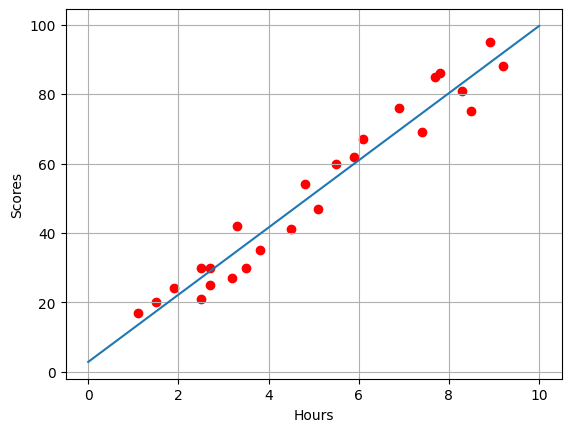

In [16]:
plt.scatter(X, y, c='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(x, slope*x + intercept)
plt.grid(True)
plt.show()

### Calculating Metrics

In [17]:
y_train_predicted = model.predict(X_train)

In [18]:
y_train_predicted=model.predict(X_train)
r_squared=r2_score(y_train,y_train_predicted)
mae=mean_absolute_error(y_train,y_train_predicted)
mse=mean_squared_error(y_train,y_train_predicted)
rmse=root_mean_squared_error(y_train,y_train_predicted)
print('r_squared :'  , r_squared)
print('mae :',mae)
print('mse :' ,mse)
print('rmse :' ,rmse)

r_squared : 0.9491209376364416
mae : 5.221357478352559
mse : 31.454835527366846
rmse : 5.608461065868858


In [19]:
y_test_predicted=model.predict(X_test)
r_squared=r2_score(y_test,y_test_predicted)
mae=mean_absolute_error(y_test,y_test_predicted)
mse=mean_squared_error(y_test,y_test_predicted)
rmse=root_mean_squared_error(y_test,y_test_predicted)
print('r_squared :'  , r_squared)
print('mae :',mae)
print('mse :' ,mse)
print('rmse :' ,rmse)

r_squared : 0.9678055545167994
mae : 3.9207511902099244
mse : 18.943211722315272
rmse : 4.352380006653288


The avantage of R-squared is that it is scaled and its values are not related to our data

<function matplotlib.pyplot.show(close=None, block=None)>

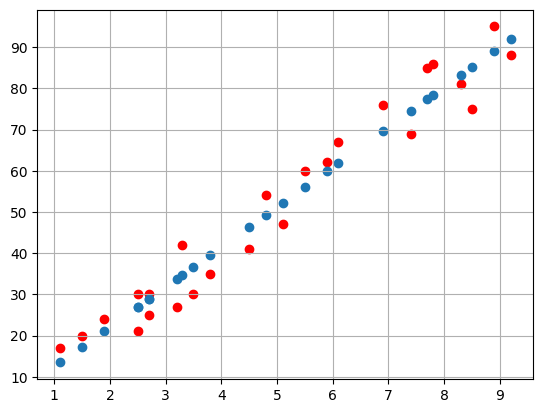

In [23]:
plt.scatter(X,y,c='red')
plt.scatter(X,model.predict(X))
plt.grid(True)
plt.show

## Risidual Plot

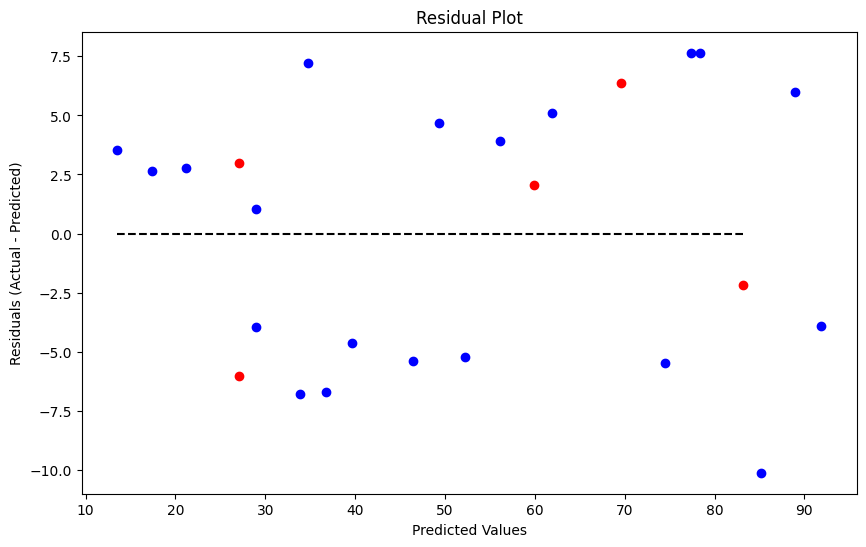

In [ ]:
train_residuals = y_train - y_train_predicted
test_residuals = y_test - y_test_predicted

plt.figure(figsize=(10, 6))
plt.scatter(y_train_predicted, train_residuals, color='blue', label='Training Residuals')
plt.scatter(y_test_predicted, test_residuals, color='red', label='Testing Residuals')
plt.hlines(y=0, xmin=min(y_train_predicted), xmax=max(y_test_predicted), colors='black', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

Ideal Fit: If the model is a good fit, residuals should be scattered randomly around the zero line without any clear pattern. 


Signs of Overfitting or Underfitting: If residuals show a pattern (e.g., curve or clustering), this could indicate issues like overfitting or underfitting.